Сначала подключим модуль thinkdsp.py

In [46]:
# Get thinkdsp.py

import os

if not os.path.exists('thinkdsp.py'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py

## УПРАЖНЕНИЕ 2.2

В данном упражнении необходимо написать класс для пилообразного сигнала и метод evaluate для оценки его значения.

In [ ]:
Код класса для пилообразного сигнала представлен ниже:

In [47]:
from thinkdsp import Sinusoid
from thinkdsp import normalize, unbias
from thinkdsp import decorate
import numpy as np
import math
PI2 = math.pi * 2

In [48]:
class SawtoothSignal(Sinusoid):
    
    def evaluate(self, ts):
        ts = np.asarray(ts)
        cycles = self.freq * ts + self.offset / PI2
        frac, _ = np.modf(cycles)
        ys = normalize(unbias(frac), self.amp)
        return ys

Создадим пилообразный сигнал, из него получим wave, выделим сегмент длительностью 3 периода и выведем на график:

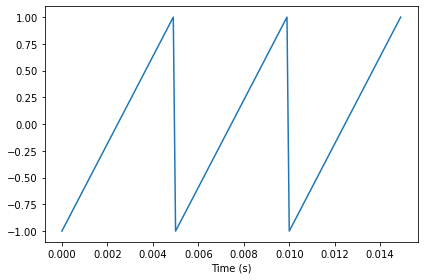

In [49]:
signal = SawtoothSignal(200)
duration = signal.period*3
segment = signal.make_wave(duration, framerate=10000)
segment.plot()
decorate(xlabel='Time (s)')

Затем выведем на график спектр сигнала: 

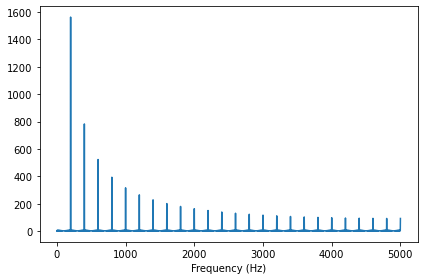

In [50]:
wave = signal.make_wave(duration=0.5, framerate=10000)
spectrum = wave.make_spectrum()
spectrum.plot()
decorate(xlabel='Frequency (Hz)')

Сравним его со спектрами треугольного и прямоугольного сигналов:

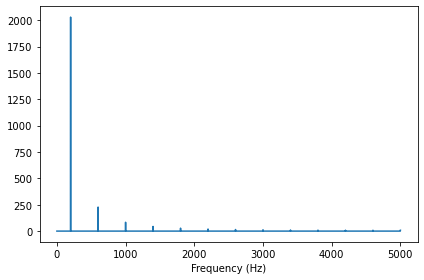

In [51]:
from thinkdsp import TriangleSignal

signal = TriangleSignal(200)
wave = signal.make_wave(duration=0.5, framerate=10000)
spectrum = wave.make_spectrum()
spectrum.plot()
decorate(xlabel='Frequency (Hz)')

Для треугольного сигнала видим, что 1) он имеет только нечетные гармоники (поэтому гармоники расположены "реже"), 2) амплитуда спадает пропорционально квадрату частоты (у пилообразного пропорционально частоте).

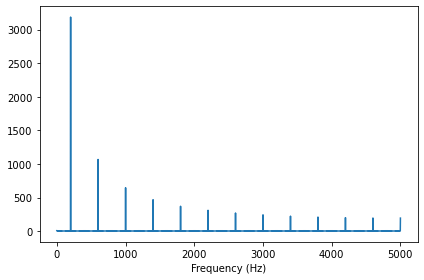

In [52]:
from thinkdsp import SquareSignal

signal = SquareSignal(200)
wave = signal.make_wave(duration=0.5, framerate=10000)
spectrum = wave.make_spectrum()
spectrum.plot()
decorate(xlabel='Frequency (Hz)')

Для прямоугольного сигнала видим: 1) он имеет только нечетные гармоники (поэтому гармоники расположены "реже"), 2) амплитуда спадает пропорционально частоте (как и в пилообразном).

## УПРАЖНЕНИЕ 2.3

Создадим прямоугольный сигнал с частотой 1100 Гц и вычислим wave с выборками 10000 кадров в секунду. Построим спектр.

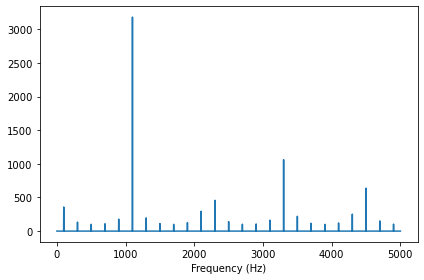

In [53]:
signal = SquareSignal(1100)
wave = signal.make_wave(duration=0.5, framerate=10000)
spectrum = wave.make_spectrum()
spectrum.plot()
decorate(xlabel='Frequency (Hz)')

Можем убедиться что произошло заворачивание гармоник (например, 3 пик не 5500 Гц, а 4500 Гц и т.д.).

In [54]:
wave.make_audio()

В итоге при прослушивании мы можем услышать искажения звука, т.к. высокочастотные составляющие накладываются на низкочастотные.

## УПРАЖНЕНИЕ 2.4

Создадим треугольный сигнал с частотой 440 Гц и получим из него wave длительностью 0.01 с. Построим его график.

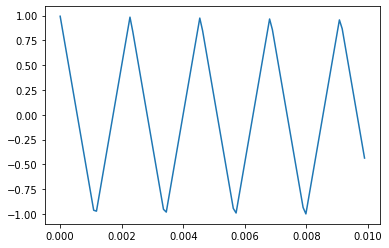

In [55]:
from thinkdsp import TriangleSignal

signal = TriangleSignal(440)
wave = signal.make_wave(duration=0.01)
wave.plot()

Далее создадим объект Spectrum и распечатаем `spectrum.hs[0]`.

In [56]:
spectrum = wave.make_spectrum()
spectrum.hs[0]

(1.0436096431476471e-14+0j)

Получим результат, близкий к 0.

Далее установим `spectrum.hs[0] = 100` и снова построим график.

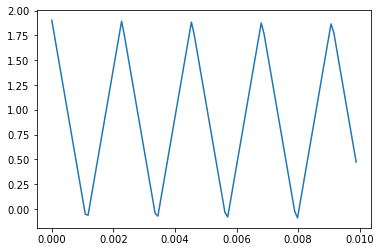

In [57]:
spectrum.hs[0] = 100
wave1 = spectrum.make_wave()
wave1.plot()

В результате сигнал сместился вертикально вверх.

## УПРАЖНЕНИЕ 2.5

В данном упражнении необходимо создать функцию, которая принимает спектр и делит каждый элемент hs на соответствующую частоту fs.

Ниже представлен код функции:

In [79]:
def hs_division(spectrum):
    spectrum.hs[0] = 0
    i=1
    while (i<len(spectrum)):
        spectrum.hs[i] /= spectrum.fs[i]
        i = i + 1

Создадим прямоугольный сигнал с частотой 250 Гц

In [80]:
from thinkdsp import SquareSignal

signal = SquareSignal(250)
wave = signal.make_wave(duration=0.5, framerate=10000)
wave.make_audio()

Вычислим спектр и построим график (синий), затем применим созданную функцию и снова построим график (красный):

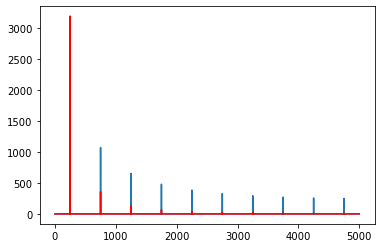

In [82]:
spectrum = wave.make_spectrum()
spectrum.plot()
hs_division(spectrum)
spectrum.scale(250)
spectrum.plot(color='red')

Видим, что амплитуда стала спадать быстрее.

In [61]:
spectrum.make_wave().make_audio()

Из-за подавления верхних частот звук стал звучать более глухо.

## УПРАЖНЕНИЕ 2.6

В данном упражнении нам нужно найти сигнал, который содержит четные и нечетные гармоники, спадающие пропорционально квадрату частоты.

За основу возьмем пилообразный сигнал с частотой 250 Гц. Он имеет четные и нечетные гармоники, но они спадают пропорционально частоте.

In [77]:
signal = SawtoothSignal(250)
wave = signal.make_wave(duration=0.5, framerate=10000)

Построим спектр (синий), затем применим функцию из предыдущего упражнения (hs_division) и снова построим спектр (красный):

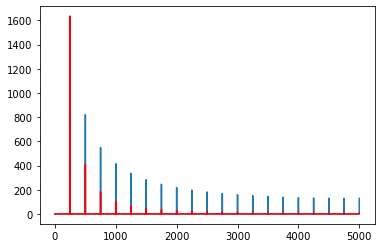

In [78]:
spectrum = wave.make_spectrum()
spectrum.plot()
hs_division(spectrum)
spectrum.scale(250)
spectrum.plot(color='red')

Видим, что теперь у сигнала есть четные и нечетные гармоники, спадающие пропорционально квадрату частоты.